In [127]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [128]:
fashion_mnist = keras.datasets.fashion_mnist

In [129]:
(train_images,train_lables),(test_images,test_lables)=fashion_mnist.load_data()

In [130]:
train_images.shape

(60000, 28, 28)

In [131]:
test_images.shape

(10000, 28, 28)

In [132]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [133]:
test_lables[0]

9

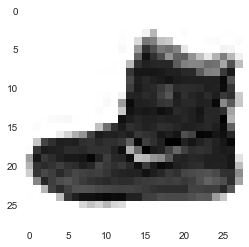

In [134]:
plt.imshow(train_images[0],cmap='gray_r')
plt.grid([])
plt.show()

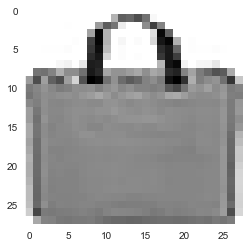

In [135]:
plt.imshow(train_images[46775],cmap='gray_r')
plt.grid([])
plt.show()

In [136]:
class_names = ['T-shirts','Trouser','Pullover','Dress','Coat','Sandal','Shirt', 'Sneaker', 'Bag', 'Ankle', 'boot']


In [137]:
class_names[train_lables[100]]

'Bag'

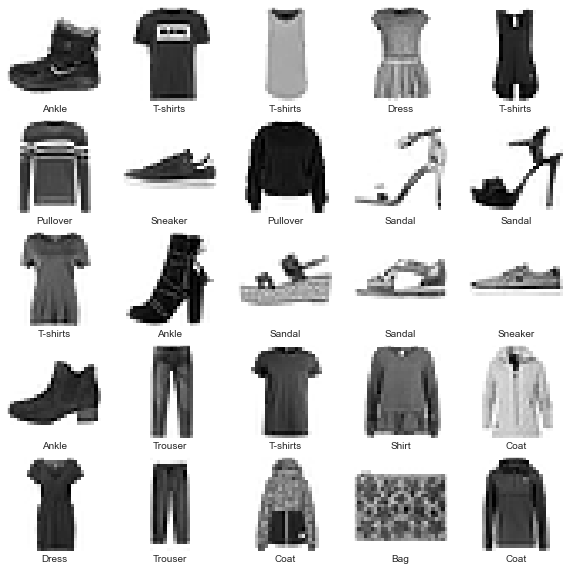

In [138]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_lables[i]])
plt.show()    

In [139]:
train_images = train_images/255.0
test_images = test_images/255.0

In [140]:
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

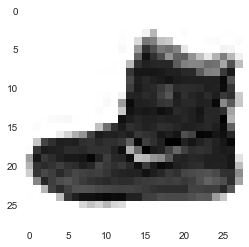

In [141]:
plt.imshow(train_images[0],cmap='gray_r')
plt.grid([])
plt.show()

In [142]:
#Creating  model

In [143]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(600,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [144]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 600)               471000    
_________________________________________________________________
dense_17 (Dense)             (None, 10)                6010      
Total params: 477,010
Trainable params: 477,010
Non-trainable params: 0
_________________________________________________________________


In [145]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [146]:
history = model.fit(train_images,train_lables,validation_split=0.2,epochs=25,verbose=1)

Epoch 1/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4936 - accuracy: 0.8232 - val_loss: 0.3818 - val_accuracy: 0.8640
Epoch 2/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3648 - accuracy: 0.8668 - val_loss: 0.4181 - val_accuracy: 0.8436
Epoch 3/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3292 - accuracy: 0.8792 - val_loss: 0.3495 - val_accuracy: 0.8754
Epoch 4/25
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3054 - accuracy: 0.8869 - val_loss: 0.3355 - val_accuracy: 0.8794
Epoch 5/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2838 - accuracy: 0.8941 - val_loss: 0.3168 - val_accuracy: 0.8876
Epoch 6/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2693 - accuracy: 0.9000 - val_loss: 0.3215 - val_accuracy: 0.8826
Epoch 7/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2572 - accuracy: 0.9038 - val_loss: 0.3354 - val_accuracy:

In [147]:
history.history

{'loss': [0.49364832043647766,
  0.3647770583629608,
  0.3291794955730438,
  0.305423378944397,
  0.28379344940185547,
  0.2693164646625519,
  0.2571560740470886,
  0.24431300163269043,
  0.2329944223165512,
  0.22435767948627472,
  0.21549855172634125,
  0.20620132982730865,
  0.19793495535850525,
  0.19166725873947144,
  0.18371321260929108,
  0.1778648942708969,
  0.17142602801322937,
  0.1650352030992508,
  0.15994998812675476,
  0.1541322022676468,
  0.1496628373861313,
  0.14634250104427338,
  0.1427597850561142,
  0.1384270191192627,
  0.13367800414562225],
 'accuracy': [0.8231874704360962,
  0.8667916655540466,
  0.8792291879653931,
  0.8869374990463257,
  0.8941249847412109,
  0.8999791741371155,
  0.9037500023841858,
  0.9080208539962769,
  0.9123958349227905,
  0.9142500162124634,
  0.9196458458900452,
  0.9221041798591614,
  0.9255625009536743,
  0.9274166822433472,
  0.9309583306312561,
  0.9330624938011169,
  0.937250018119812,
  0.9382291436195374,
  0.9397500157356262,


Text(0.5, 1.0, 'Tranning And Validation Loss')

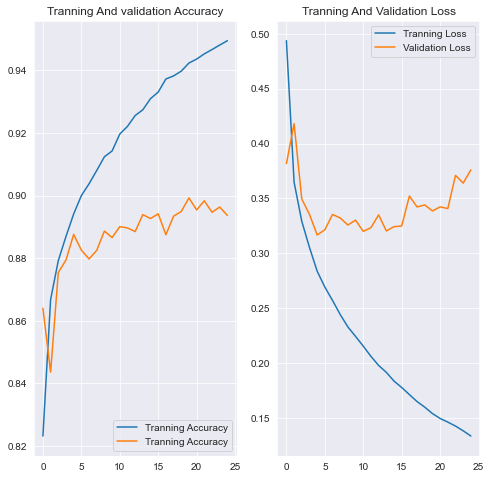

In [149]:
epochs = 25
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Tranning Accuracy')
plt.plot (epochs_range,val_acc,label='Tranning Accuracy')
plt.legend(loc='lower right')
plt.title('Tranning And validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Tranning Loss')
plt.plot(epochs_range,val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Tranning And Validation Loss')



# Callback / Early Stopping

In [150]:
model_new = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [151]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 600)               471000    
_________________________________________________________________
dense_17 (Dense)             (None, 10)                6010      
Total params: 477,010
Trainable params: 477,010
Non-trainable params: 0
_________________________________________________________________


In [152]:
model_new.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [153]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)

In [ ]:
history = model_new.fit(train_images,train_lables,epochs=30,validation_split=0.2, callbacks=callback,verbose=1)

Epoch 1/30
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4916 - accuracy: 0.8257 - val_loss: 0.4547 - val_accuracy: 0.8334
Epoch 2/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3711 - accuracy: 0.8643 - val_loss: 0.3592 - val_accuracy: 0.8703
Epoch 3/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3325 - accuracy: 0.8768 - val_loss: 0.3651 - val_accuracy: 0.8621
Epoch 4/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3055 - accuracy: 0.8869 - val_loss: 0.3384 - val_accuracy: 0.8794
Epoch 5/30
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2858 - accuracy: 0.8940 - val_loss: 0.3536 - val_accuracy: 0.8744
Epoch 6/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2681 - accuracy: 0.9004 - val_loss: 0.3336 - val_accuracy: 0.8805
Epoch 7/30
1484/1500 [============================>.] - ETA: 0s - loss: 0.2555 - accuracy: 0.9042 ETA: 1s - loss: 0.2514 

In [97]:
history.history

{'loss': [0.49580079317092896,
  0.36722835898399353,
  0.32920411229133606,
  0.3025982677936554,
  0.28543826937675476,
  0.2693626284599304,
  0.2542283833026886,
  0.24204586446285248,
  0.2328735589981079,
  0.2232782244682312,
  0.2151414155960083,
  0.20501399040222168,
  0.19776934385299683,
  0.1902747005224228,
  0.1853565126657486,
  0.17632634937763214],
 'accuracy': [0.8226875066757202,
  0.8651041388511658,
  0.8788958191871643,
  0.8886250257492065,
  0.8950833082199097,
  0.9009583592414856,
  0.9048749804496765,
  0.9080416560173035,
  0.9128749966621399,
  0.9163958430290222,
  0.9199166893959045,
  0.9230208396911621,
  0.924875020980835,
  0.9276041388511658,
  0.929604172706604,
  0.9336458444595337],
 'val_loss': [0.4074562191963196,
  0.376671701669693,
  0.3467330038547516,
  0.3519575893878937,
  0.3389429748058319,
  0.3411196768283844,
  0.32570984959602356,
  0.32324647903442383,
  0.3610372245311737,
  0.31701168417930603,
  0.3107399642467499,
  0.35081234

Text(0.5, 1.0, 'Training and Validation Loss')

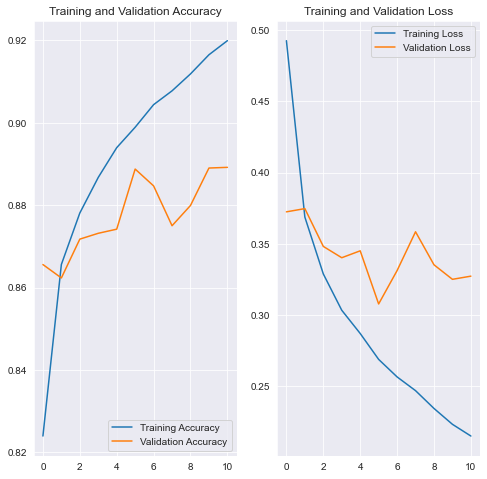

In [126]:
epochs = 11
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
